<a href="https://colab.research.google.com/github/son50git/Routine-with-Python/blob/master/StackedBar_v9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def stackedBarCategories (rpt_name, roll_prd, SHOW_STATS):

  from google.colab import drive, files
  drive.mount("/content/drive")
  uploaded = files.upload()

  sheets = ["RD Cats", "Hist Days of Week(non-Adj)"]

  for sheet in sheets:

    cats_df = pd.read_excel(rpt_name, sheet_name=sheet)  

    if sheet=="Hist Days of Week(non-Adj)":
      cats_df = cats_df[['ART','SLP','ORD','LES','TRA','Rel','Ref','PHA','SPC']]
    else:
      cats_df["ART"] = cats_df.ART.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["SLP"] = cats_df.SLP.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["ORD"] = cats_df.ORD.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["LES"] = cats_df.LES.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["TRA"] = cats_df.TRA.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["Rel"] = cats_df.Rel.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["Ref"] = cats_df.Ref.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["PHA"] = cats_df.PHA.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df["SPC"] = cats_df.SPC.rolling(roll_prd, min_periods=roll_prd).mean()
      cats_df = cats_df.tail(21)

      if SHOW_STATS == 1:
        cats_df.reset_index(inplace=True)
        cats_df.index = cats_df.index + 1
        cats_df2 = cats_df[['Date','Day','ORD','TRA','SPC','LES','SLP']]
        print()
        print(cats_df2.tail(21))
        cats_df1 = cats_df[['Date','Day','ART','Rel','Ref','PHA']]
        cats_df1["Pos_PCT"] = cats_df1.iloc[:, -4:-1].sum(axis=1) / 1440.00
        print()
        print(cats_df1.tail(21))

      tmp_2 = [i + j for i,j in zip(cats_df["ART"],cats_df["Rel"])]
      tmp_3 = [i + j for i,j in zip(tmp_2,cats_df["Ref"])]
      tmp_4 = [i + j for i,j in zip(tmp_3,cats_df["PHA"])]
      tmp_5 = [i + j for i,j in zip(tmp_4,cats_df["ORD"])]
      tmp_6 = [i + j for i,j in zip(tmp_5,cats_df["TRA"])]
      tmp_7 = [i + j for i,j in zip(tmp_6,cats_df["SPC"])]
      tmp_8 = [i + j for i,j in zip(tmp_7,cats_df["LES"])]

      f, ax = plt.subplots(1, figsize=(12,5))
      bar_l = [i+1 for i in range(len(cats_df['ART']))]
      ax.bar(bar_l, cats_df["ART"], label="ART", color="olive")
      ax.bar(bar_l, cats_df["Rel"], label="Rel", color="purple", bottom=cats_df["ART"])
      ax.bar(bar_l, cats_df["Ref"], label="Ref", color="pink", bottom=tmp_2)
      ax.bar(bar_l, cats_df["PHA"], label="PHA", color="cyan", bottom=tmp_3)
      ax.bar(bar_l, cats_df["ORD"], label="ORD", color="brown", bottom=tmp_4)
      ax.bar(bar_l, cats_df["TRA"], label="TRA", color="gray", bottom=tmp_5)
      ax.bar(bar_l, cats_df["SPC"], label="SPC", color="black", bottom=tmp_6)
      ax.bar(bar_l, cats_df["LES"], label="LES", color="red", bottom=tmp_7)
      ax.bar(bar_l, cats_df["SLP"], label="SLP", color="blue", bottom=tmp_8)
      ax.legend(loc='center left', bbox_to_anchor=(1, 0.75))
      print()

Mounted at /content/drive


Saving Routine_rpts_20201126_0305.xlsx to Routine_rpts_20201126_0305.xlsx



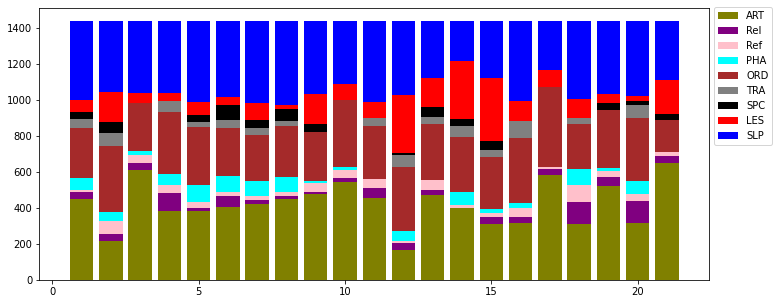

In [3]:
rpt_name ="Routine_rpts_20201126_0305.xlsx"
stackedBarCategories(rpt_name, roll_prd=1, SHOW_STATS=0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Routine_rpts_20201126_0305.xlsx to Routine_rpts_20201126_0305 (1).xlsx

          Date  Day         ORD        TRA        SPC         LES         SLP
1   11/05/2020  THU  348.142857  43.428571  25.714286  138.000000  406.714286
2   11/06/2020  FRI  354.857143  48.428571  28.714286  111.571429  424.000000
3   11/07/2020  SAT  332.428571  44.571429  26.857143  111.428571  410.857143
4   11/08/2020  SUN  306.000000  49.285714  26.857143   73.000000  401.571429
5   11/09/2020  MON  309.571429  44.000000  29.714286   73.285714  417.000000
6   11/10/2020  TUE  305.000000  43.714286  33.285714   65.571429  417.285714
7   11/11/2020  WED  300.857143  41.428571  37.857143   77.571429  424.571429
8   11/12/2020  THU  301.142857  38.714286  41.857143   71.428571  428.428571
9   11/13/2020  FRI  287.285714  28.571429  39.428571   71.142857  430.142857
10  11/14/2020  SAT  302.285714  28.571429  39.428571   75.571429  423.000000
11  11/15/2020  SUN  295.428571  26.428571  39.428571   82.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


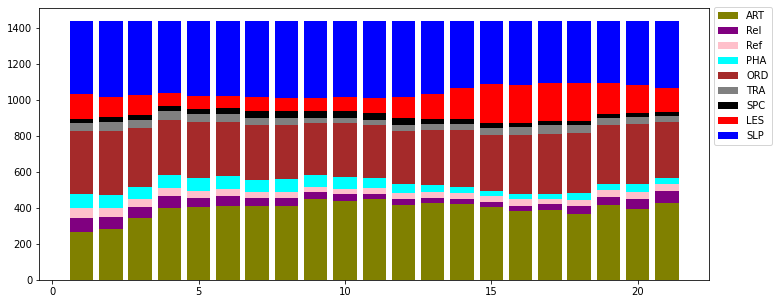

In [4]:
rpt_name ="Routine_rpts_20201126_0305.xlsx"
stackedBarCategories(rpt_name, roll_prd=7, SHOW_STATS=1)

In [33]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Woes_and_Scores(rpt_name):

  from google.colab import drive, files
  drive.mount("/content/drive")
  uploaded = files.upload()
  
  sheets = ["Daily_Output_Sup"]

  for sheet in sheets:

    if sheet=="Daily_Output_Sup":

      woes_df = pd.read_excel(rpt_name, sheet_name=sheet)
      woes_df = woes_df[["DATE","DAY","WOE","SCORE" ]]
      woes_df.reset_index().set_index(['DATE'])
      woes_df["woe_rolling"] = woes_df.WOE.rolling(7, 7).mean()
      woes_df["score_rolling"] = woes_df.SCORE.rolling(7, 7).mean()
  
      print(woes_df.tail(7))
      plt.plot(woes_df['woe_rolling'])
      plt.show()

      plt.plot(woes_df['score_rolling'])
      plt.show()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Routine_rpts_20201126_2329.xlsx to Routine_rpts_20201126_2329 (12).xlsx
          DATE  DAY       WOE  SCORE  woe_rolling  score_rolling
52  11/20/2020  FRI -0.243316    108    -0.503415      84.000000
53  11/21/2020  SAT  0.310726    100    -0.488572      77.714286
54  11/22/2020  SUN  0.519827    163    -0.362314      92.142857
55  11/23/2020  MON  0.602033    162    -0.099680     107.285714
56  11/24/2020  TUE  0.235693    182     0.053353     124.857143
57  11/25/2020  WED  0.550494     96     0.224085     126.857143
58  11/26/2020  THU  0.991282    199     0.423820     144.285714


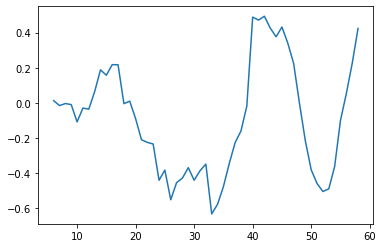

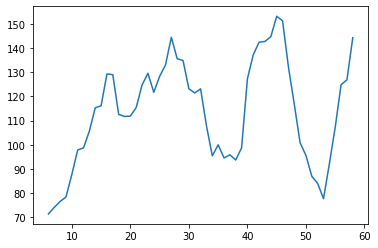

In [34]:
rpt_name ="Routine_rpts_20201126_2329.xlsx"
Woes_and_Scores(rpt_name)